In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score, roc_auc_score

In [2]:
df = pd.read_csv('./Apply_Rate_2019.csv')
df.shape

(1200890, 10)

In [3]:
df.columns

Index(['title_proximity_tfidf', 'description_proximity_tfidf',
       'main_query_tfidf', 'query_jl_score', 'query_title_score', 'city_match',
       'job_age_days', 'apply', 'search_date_pacific', 'class_id'],
      dtype='object')

In [0]:
not_cat_cols = ['title_proximity_tfidf', 'description_proximity_tfidf', 'main_query_tfidf', 'query_jl_score', 'query_title_score',  'job_age_days']

In [5]:
df.head().T

,0,1,2,3,4
title_proximity_tfidf,0,11.874,11.874,0,NaN
description_proximity_tfidf,0,0.043637,0.043637,0,NaN
main_query_tfidf,0,2.52708,2.52708,3.69581,7.8689
query_jl_score,0.00482431,0.0119353,0.0119353,0.0130464,0.00806452
query_title_score,0.00662807,0.011208,0.011208,0.0333403,0.00877193
city_match,0,0,0,0,0
job_age_days,5,5,5,5,7
apply,0,0,1,0,0
search_date_pacific,2018-01-21,2018-01-21,2018-01-21,2018-01-23,2018-01-24
class_id,-7613806991329176388,-1361819269400927213,-1361819269400927213,-3623880078591607667,-7054510112423797411


In [0]:
df.describe()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,class_id
count,948319.000000,948319.000000,1.200890e+06,1.200890e+06,1.200890e+06,944335.000000,1.200890e+06,1.200890e+06,1.200890e+06
mean,5.889800,0.096119,1.770301e+00,1.711024e-02,3.580456e-02,0.563676,1.010130e+01,8.993580e-02,-3.956263e+17
std,9.749672,0.284249,2.237259e+00,1.220871e-02,4.886690e-02,0.495929,1.738912e+01,2.860899e-01,5.664017e+18
min,0.000000,0.000000,0.000000e+00,1.000000e-06,9.998021e-07,0.000000,0.000000e+00,0.000000e+00,-9.049388e+18
25%,0.000000,0.000000,0.000000e+00,1.063830e-02,1.256780e-02,0.000000,2.000000e+00,0.000000e+00,-4.593390e+18
50%,0.000000,0.000000,2.509947e-01,1.578868e-02,2.066189e-02,1.000000,6.000000e+00,0.000000e+00,-1.614083e+18
75%,11.642839,0.063633,3.423265e+00,2.043710e-02,3.760018e-02,1.000000,1.400000e+01,0.000000e+00,4.315422e+18
max,93.516720,7.301161,1.774189e+01,2.556893e-01,1.294088e+00,1.000000,1.340000e+03,1.000000e+00,9.204124e+18


In [0]:
# Number of unique entries
df.astype(object).describe(include='all').loc['unique', :]

title_proximity_tfidf          225538
description_proximity_tfidf    342918
main_query_tfidf               517282
query_jl_score                 181318
query_title_score              343323
city_match                          2
job_age_days                      491
apply                               2
search_date_pacific                 7
class_id                          157
Name: unique, dtype: object

In [0]:
# Number of Null Entries
df.isnull().sum(axis=0)

title_proximity_tfidf          252571
description_proximity_tfidf    252571
main_query_tfidf                    0
query_jl_score                      0
query_title_score                   0
city_match                     256555
job_age_days                        0
apply                               0
search_date_pacific                 0
class_id                            0
dtype: int64

In [0]:
# Correlation Matrix
df.corr().style.background_gradient()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,class_id
title_proximity_tfidf,1,0.107818,0.704579,0.208132,0.371528,-0.0606927,0.0431387,0.0482417,0.01719
description_proximity_tfidf,0.107818,1,0.0226645,0.0959929,0.00358764,-0.0102031,0.0114363,-0.00329066,0.00566131
main_query_tfidf,0.704579,0.0226645,1,0.0107382,0.209315,-0.0773882,0.0875467,0.0390501,0.0185585
query_jl_score,0.208132,0.0959929,0.0107382,1,0.387003,-0.0181372,0.0171382,0.0574431,0.0778891
query_title_score,0.371528,0.00358764,0.209315,0.387003,1,-0.0422243,0.0169877,0.0638322,0.0618706
city_match,-0.0606927,-0.0102031,-0.0773882,-0.0181372,-0.0422243,1,-0.00061378,0.00308262,-0.00458481
job_age_days,0.0431387,0.0114363,0.0875467,0.0171382,0.0169877,-0.00061378,1,-0.0118286,0.00395271
apply,0.0482417,-0.00329066,0.0390501,0.0574431,0.0638322,0.00308262,-0.0118286,1,0.0116747
class_id,0.01719,0.00566131,0.0185585,0.0778891,0.0618706,-0.00458481,0.00395271,0.0116747,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249CB699128>,
      dtype=object)

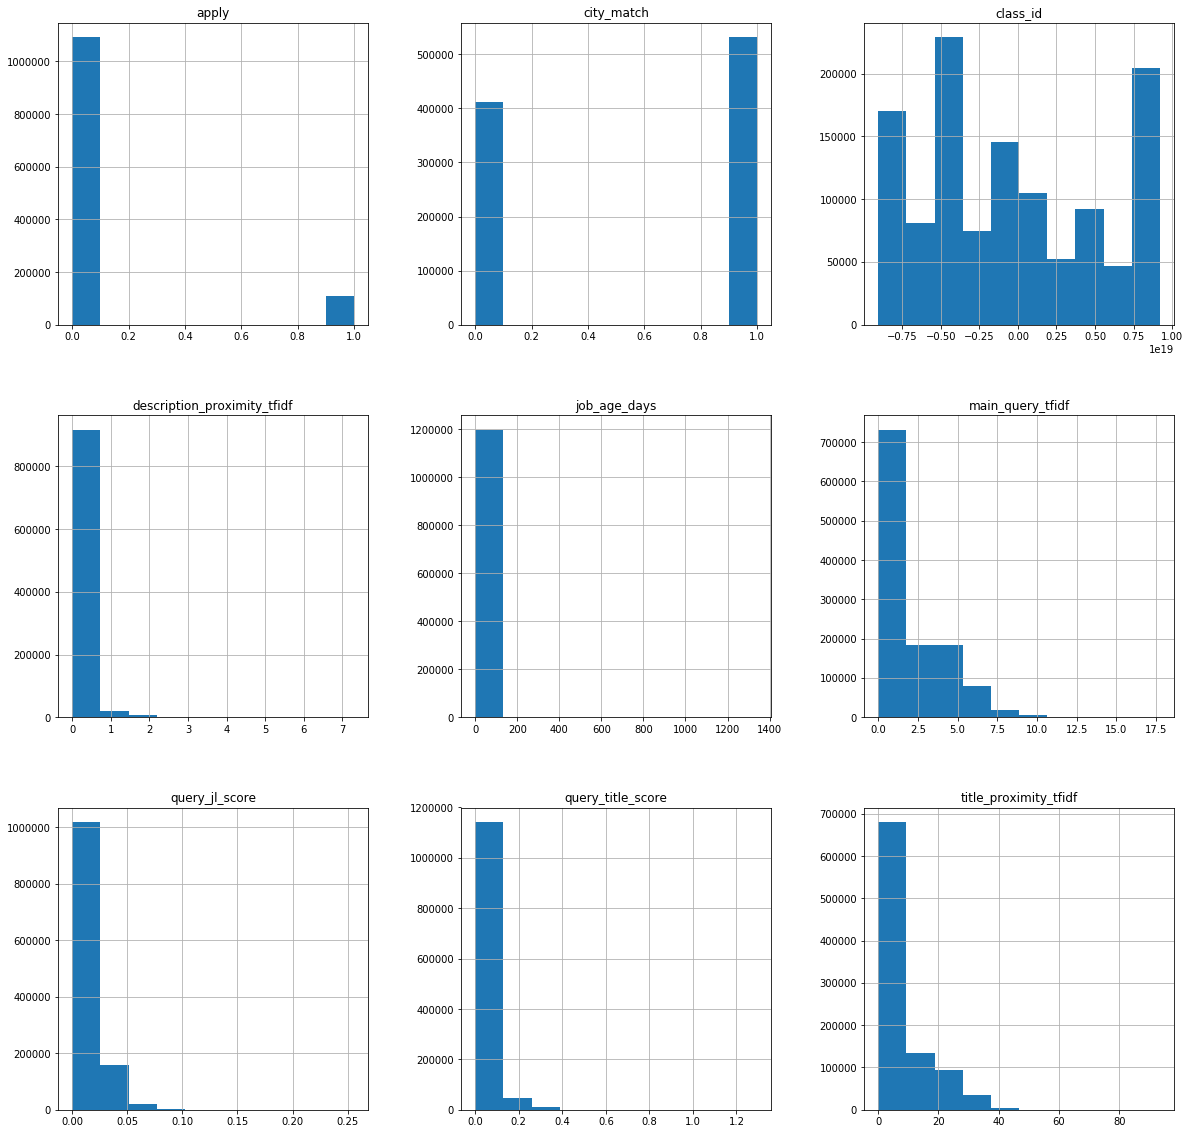

In [0]:
df.hist(figsize=(20,20))

In [0]:
print(df['apply'].value_counts())
print(df['apply'].value_counts()[0] / len(df) * 100)
print(df['apply'].value_counts()[1] / len(df) * 100)

0    1092887
1     108003
Name: apply, dtype: int64
91.00642023832324
8.993579761676756


In [0]:
df.fillna(0, inplace=True)
df['class_id'] = df['class_id'].astype('category').cat.codes

In [0]:
from sklearn.preprocessing import StandardScaler
# Preprocessing
def preprocess(to_remove, normalize=False):
    #Normalization
    df[not_cat_cols] = (df[not_cat_cols] - df[not_cat_cols].mean()) / (df[not_cat_cols].max() - df[not_cat_cols].min())
    
    df_train = df[df.search_date_pacific != '2018-01-27']
    df_test = df[df.search_date_pacific == '2018-01-27']
    
    global X_train
    X_train = df_train.drop(columns=to_remove).values
    global y_train 
    y_train  = df_train['apply'].values
    global X_test 
    X_test = df_test.drop(columns=to_remove).values
    global y_test 
    y_test = df_test['apply'].values
    
    #Normalization
#     if normalize:    
#         scaler = StandardScaler()
#         scaler.fit(X_train)
#         X_train = scaler.transform(X_train)
#         X_test = scaler.transform(X_test)

In [0]:
def classify(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)
    print(clf)
    print("ROC AUC:", roc_auc_score(y_test, y_pred[:,1]))
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Detailed confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    
    
from imblearn.over_sampling import SMOTE

def classify_with_smote(clf):
    smote = SMOTE(random_state=0, n_jobs=-1, sampling_strategy=4/6)
    global X_train, y_train 
    X_train, y_train = smote.fit_resample(X_train, y_train)
    classify(clf)

In [0]:
to_remove = ['apply', 'search_date_pacific', 'class_id']
preprocess(to_remove)

In [0]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, class_weight='balanced', n_jobs=-1)
classify(clf)

c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
ROC AUC: 0.5883860726501579
              precision    recall  f1-score   support

           0       0.93      0.66      0.77    105940
           1       0.12      0.47      0.19     10586

   micro avg       0.64      0.64      0.64    116526
   macro avg       0.52      0.56      0.48    116526
weighted avg       0.85      0.64      0.72    116526

Detailed confusion matrix:
[[69921 36019]
 [ 5658  4928]]
Accuracy Score: 0.6423373324408287


In [0]:
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=0, max_depth=8, n_jobs=-1, scale_pos_weight=6)
classify(clf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=6,
       seed=None, silent=True, subsample=1)
ROC AUC: 0.605199221682646
              precision    recall  f1-score   support

           0       0.92      0.95      0.93    105940
           1       0.20      0.13      0.16     10586

   micro avg       0.87      0.87      0.87    116526
   macro avg       0.56      0.54      0.54    116526
weighted avg       0.85      0.87      0.86    116526

Detailed confusion matrix:
[[100476   5464]
 [  9217   1369]]
Accuracy Score: 0.8740109503458455


In [0]:
to_remove = ['apply', 'search_date_pacific', 'class_id']
preprocess(to_remove, normalize=True)

In [0]:
clf = XGBClassifier(random_state=0, max_depth=8, n_jobs=-1)
classify(clf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
ROC AUC: 0.6068051184895856
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    105940
           1       0.00      0.00      0.00     10586

   micro avg       0.91      0.91      0.91    116526
   macro avg       0.45      0.50      0.48    116526
weighted avg       0.83      0.91      0.87    116526

Detailed confusion matrix:
[[105940      0]
 [ 10586      0]]
Accuracy Score: 0.9091533220053893


c:\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
clf = XGBClassifier(random_state=0, max_depth=8, n_jobs=-1, scale_pos_weight=6)
classify(clf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=6,
       seed=None, silent=True, subsample=1)
ROC AUC: 0.605199221682646
              precision    recall  f1-score   support

           0       0.92      0.95      0.93    105940
           1       0.20      0.13      0.16     10586

   micro avg       0.87      0.87      0.87    116526
   macro avg       0.56      0.54      0.54    116526
weighted avg       0.85      0.87      0.86    116526

Detailed confusion matrix:
[[100476   5464]
 [  9217   1369]]
Accuracy Score: 0.8740109503458455


In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, class_weight='balanced', n_jobs=-1)
classify_with_smote(clf)

c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
ROC AUC: 0.5886791449776352
              precision    recall  f1-score   support

           0       0.93      0.65      0.76    105940
           1       0.12      0.48      0.19     10586

   micro avg       0.64      0.64      0.64    116526
   macro avg       0.52      0.56      0.48    116526
weighted avg       0.85      0.64      0.71    116526

Detailed confusion matrix:
[[68991 36949]
 [ 5555  5031]]
Accuracy Score: 0.6352402039029916


In [15]:
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=0, max_depth=8, n_jobs=-1)
classify_with_smote(clf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
ROC AUC: 0.5579752325505624
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    105940
           1       0.21      0.00      0.01     10586

   micro avg       0.91      0.91      0.91    116526
   macro avg       0.56      0.50      0.48    116526
weighted avg       0.85      0.91      0.87    116526

Detailed confusion matrix:
[[105835    105]
 [ 10558     28]]
Accuracy Score: 0.9084925252733296


In [0]:
to_remove = ['apply', 'search_date_pacific']
preprocess(to_remove)

In [0]:
clf = XGBClassifier(random_state=0, max_depth=8, n_jobs=-1)
classify(clf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
ROC AUC: 0.622422824896411
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    105940
           1       0.00      0.00      0.00     10586

   micro avg       0.91      0.91      0.91    116526
   macro avg       0.45      0.50      0.48    116526
weighted avg       0.83      0.91      0.87    116526

Detailed confusion matrix:
[[105940      0]
 [ 10586      0]]
Accuracy Score: 0.9091533220053893


c:\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
clf = LogisticRegression(random_state=0, class_weight='balanced', n_jobs=-1)
classify(clf)

c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
ROC AUC: 0.5880638495794542
              precision    recall  f1-score   support

           0       0.93      0.66      0.77    105940
           1       0.12      0.47      0.19     10586

   micro avg       0.64      0.64      0.64    116526
   macro avg       0.52      0.56      0.48    116526
weighted avg       0.85      0.64      0.72    116526

Detailed confusion matrix:
[[69888 36052]
 [ 5657  4929]]
Accuracy Score: 0.6420627156171155


In [0]:
to_remove = ['apply', 'search_date_pacific']
preprocess(to_remove, normalize=True)

In [0]:
clf = XGBClassifier(random_state=0, max_depth=8, n_jobs=-1, reg_lambda=6)
classify(clf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=6, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
ROC AUC: 0.6235080462899393
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    105940
           1       0.00      0.00      0.00     10586

   micro avg       0.91      0.91      0.91    116526
   macro avg       0.45      0.50      0.48    116526
weighted avg       0.83      0.91      0.87    116526

Detailed confusion matrix:
[[105940      0]
 [ 10586      0]]
Accuracy Score: 0.9091533220053893


c:\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
clf = LogisticRegression(C= 0.001, random_state=0, class_weight='balanced', n_jobs=-1)
classify(clf)

c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
ROC AUC: 0.5797081134261731
              precision    recall  f1-score   support

           0       0.92      0.69      0.79    105940
           1       0.12      0.43      0.19     10586

   micro avg       0.66      0.66      0.66    116526
   macro avg       0.52      0.56      0.49    116526
weighted avg       0.85      0.66      0.73    116526

Detailed confusion matrix:
[[72615 33325]
 [ 6034  4552]]
Accuracy Score: 0.6622298886085509


In [0]:
#Took forever to run

# from sklearn.svm import SVC

# clf = SVC(probability=True, C=0.01)
# classify(clf)

In [0]:
clf = XGBClassifier(random_state=0, max_depth=8, n_jobs=-1, reg_lambda=6)
classify_with_smote(clf)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=6, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
ROC AUC: 0.5835380348539883
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    105940
           1       0.25      0.00      0.01     10586

   micro avg       0.91      0.91      0.91    116526
   macro avg       0.58      0.50      0.48    116526
weighted avg       0.85      0.91      0.87    116526

Detailed confusion matrix:
[[105827    113]
 [ 10548     38]]
Accuracy Score: 0.9085096888248116


In [0]:
clf = LogisticRegression(random_state=0, class_weight='balanced', n_jobs=-1)
classify_with_smote(clf)

c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
ROC AUC: 0.5876126158339006
              precision    recall  f1-score   support

           0       0.93      0.63      0.75    105940
           1       0.12      0.49      0.19     10586

   micro avg       0.62      0.62      0.62    116526
   macro avg       0.52      0.56      0.47    116526
weighted avg       0.85      0.62      0.70    116526

Detailed confusion matrix:
[[66972 38968]
 [ 5376  5210]]
Accuracy Score: 0.6194497365394848
